In [1]:
from data_utilities import load_mnist
X = load_mnist('multi-scale-mnist/')[0]

In [2]:
import numpy as np
import mxnet.ndarray as nd
def np_nd(f):
    def wrapped(*args, **kwargs):
        convert = lambda array : nd.array(array) if isinstance(array, np.ndarray) else array
        args = map(convert, args)
        kwargs = dict(zip(kwargs.keys(), map(convert, kwargs.values())))
        return f(*args, **kwargs)
    return wrapped

In [3]:
@np_nd
def msp(data, n_scalse, pool_type, factors=None):
    filters = []
    for i in range(n_scalse):
        kernel = (i * 2 + 1,) * 2
        pad = (i,) * 2
        f = nd.Pooling(data=data, pool_type=pool_type, kernel=kernel, stride=(1, 1), pad=pad)
        filters.append(f)
    if factors is None:
        factors = (1.0 / n_scalse,) * n_scalse
    return sum(f * factor for f, factor in zip(filters, factors))

In [4]:
FROM, TO = 0, 3
blurred = X[FROM : TO].reshape((TO - FROM, 1, 56, 56))
blurred = msp(blurred, 5, 'avg')
blurred = blurred.reshape((TO - FROM, 56, 56)).asnumpy()

/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:66: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  inline backend."""
/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:71: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  'retina', 'jpeg', 'svg', 'pdf'.""")
/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:85: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag() method, e.g., Int().tag(key1='value1', key2='value2')
  use `figure_formats` instead)""")
/usr/local/lib/python2.7/dist-packages/ipykernel/pylab/config.py:95: DeprecationWarning: metadata {'config': True} was set from the constructor.  Metadata should be set using the .tag()

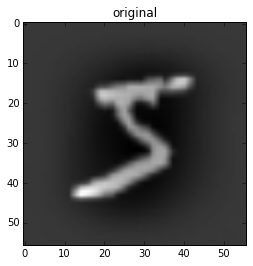

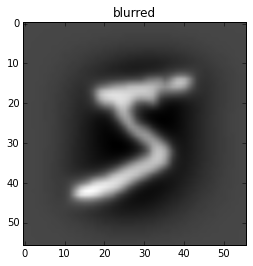

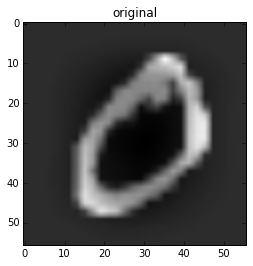

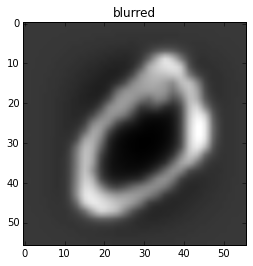

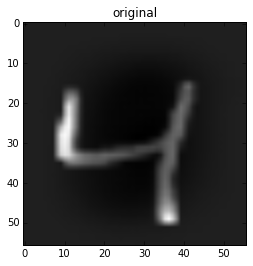

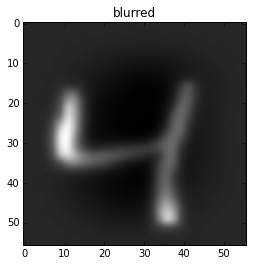

In [5]:
import matplotlib.pylab as pl
%matplotlib inline
for i in range(FROM, TO):
    pl.figure()
    pl.title('original')
    pl.imshow(X[i].reshape((56, 56)), cmap='gray')
    pl.figure()
    pl.title('blurred')
    pl.imshow(blurred[i].reshape((56, 56)), cmap='gray')

In [6]:
FROM, TO = 0, 3
blurred = X[FROM : TO].reshape((TO - FROM, 1, 56, 56))
blurred = msp(blurred, 5, 'max')
blurred = blurred.reshape((TO - FROM, 56, 56)).asnumpy()

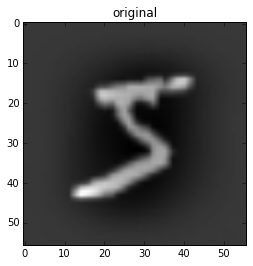

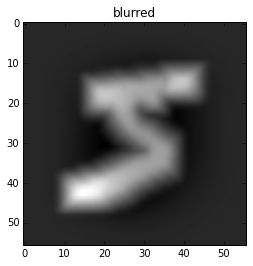

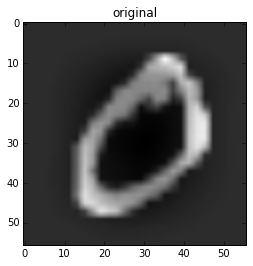

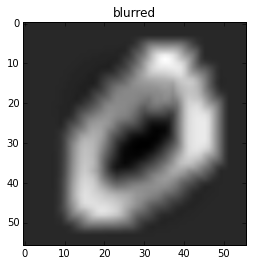

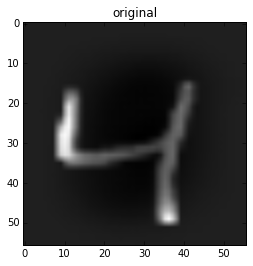

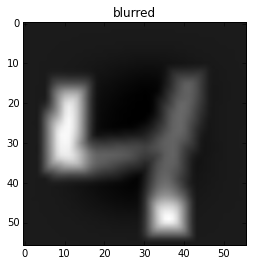

In [7]:
import matplotlib.pylab as pl
%matplotlib inline
for i in range(FROM, TO):
    pl.figure()
    pl.title('original')
    pl.imshow(X[i].reshape((56, 56)), cmap='gray')
    pl.figure()
    pl.title('blurred')
    pl.imshow(blurred[i].reshape((56, 56)), cmap='gray')

In [8]:
FROM, TO = 0, 3
blurred = X[FROM : TO].reshape((TO - FROM, 1, 56, 56))
blurred = msp(blurred, 5, 'max', (0, 0, 0, 0, 1)) # only use statistics
blurred = blurred.reshape((TO - FROM, 56, 56)).asnumpy()

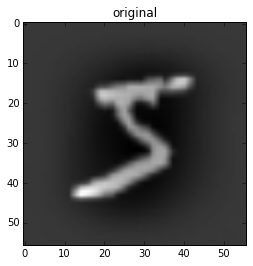

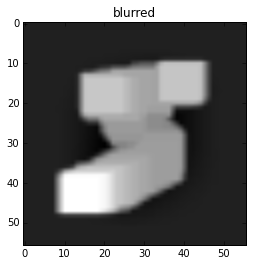

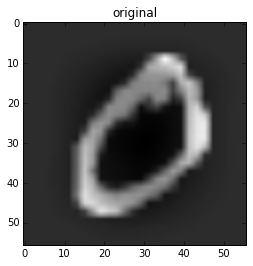

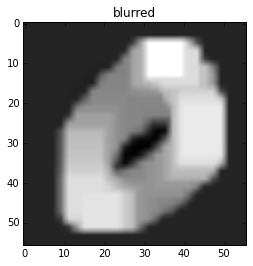

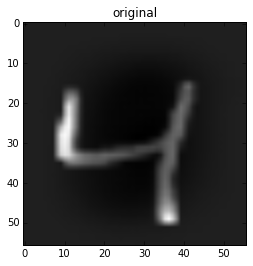

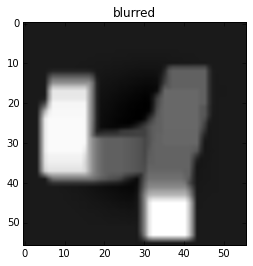

In [9]:
import matplotlib.pylab as pl
%matplotlib inline
for i in range(FROM, TO):
    pl.figure()
    pl.title('original')
    pl.imshow(X[i].reshape((56, 56)), cmap='gray')
    pl.figure()
    pl.title('blurred')
    pl.imshow(blurred[i].reshape((56, 56)), cmap='gray')